<a href="https://colab.research.google.com/github/laszlorasko/Practical-Deep-Learning-for-Coders-2.0/blob/master/First_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai -q --upgrade

In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [ ]:
import torch
import numpy as np

In [ ]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = None) -> 'Path'
    Download `url` using `FastDownload.get`



In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
np.random.seed(2)

In [ ]:
path.ls()[:3]

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
path = untar_data(URLs.PETS)
fnames = get_image_files(path/'images')
pat = r'(.+)_\d+.jpg$'

In [ ]:
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs=64

In [ ]:
dls = ImageDataLoaders.from_name_re(path, fnames, pat, batch_tfms=batch_tfms,
                                   item_tfms=item_tfms, bs=bs)

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [ ]:
path_im = path/'images'

In [ ]:
dls = pets.dataloaders(path_im, bs=bs)

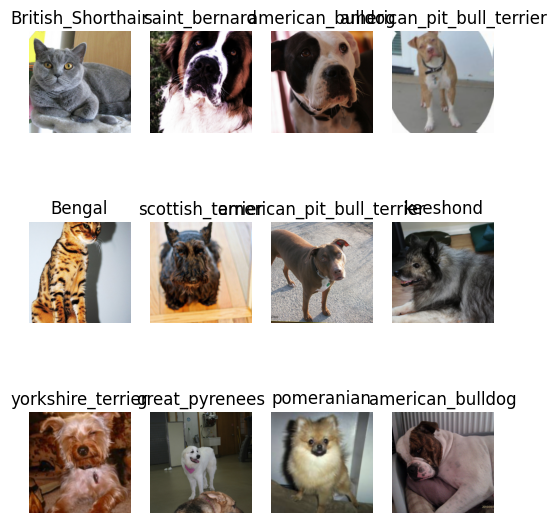

In [ ]:
dls.show_batch(max_n=12, figsize=(6,7))

In [ ]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [ ]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [ ]:
learn.fit_one_cycle(4)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,1.907082,0.378115,0.126522,01:05
1,0.651096,0.264454,0.086604,00:59
2,0.372738,0.243613,0.081191,00:56
3,0.273407,0.238037,0.078484,00:57


In [ ]:
learn.save('stage_1')

Path('models/stage_1.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

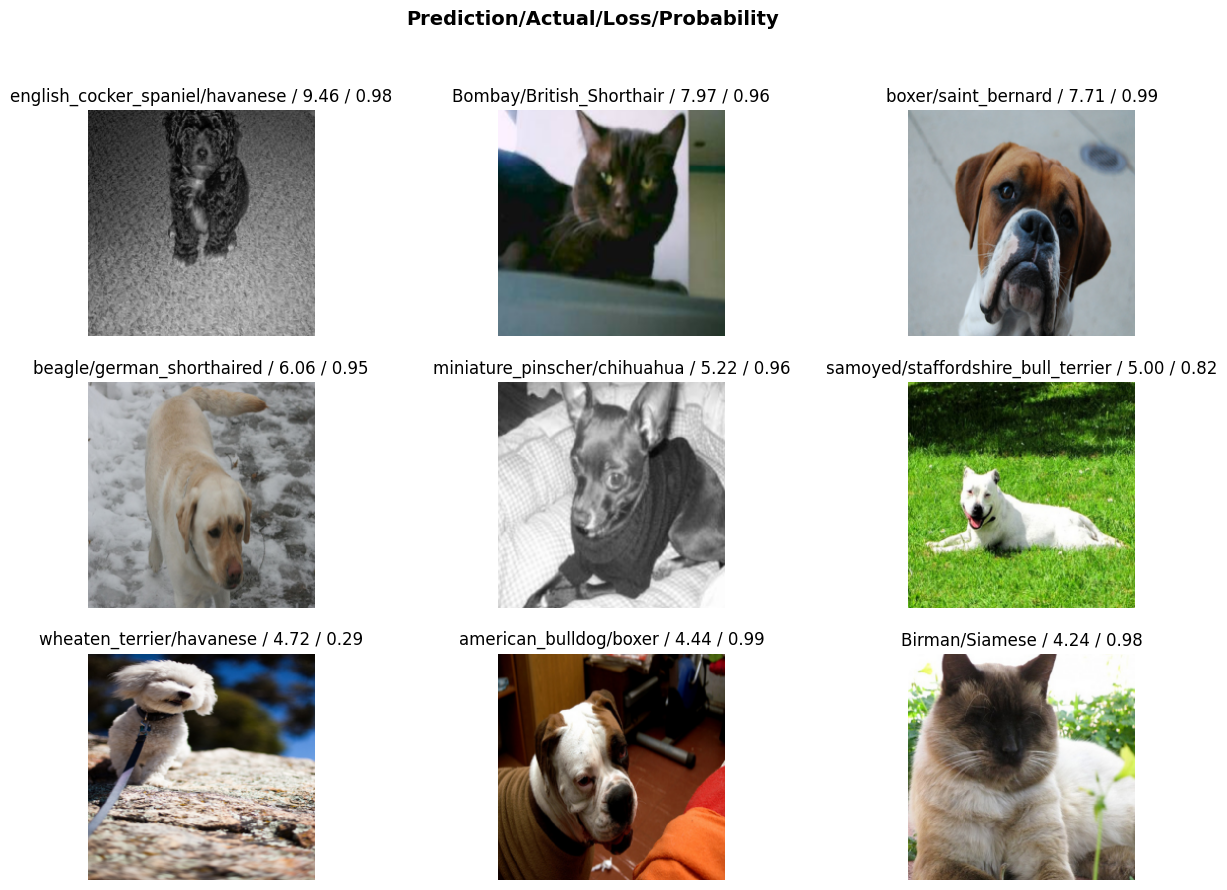

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

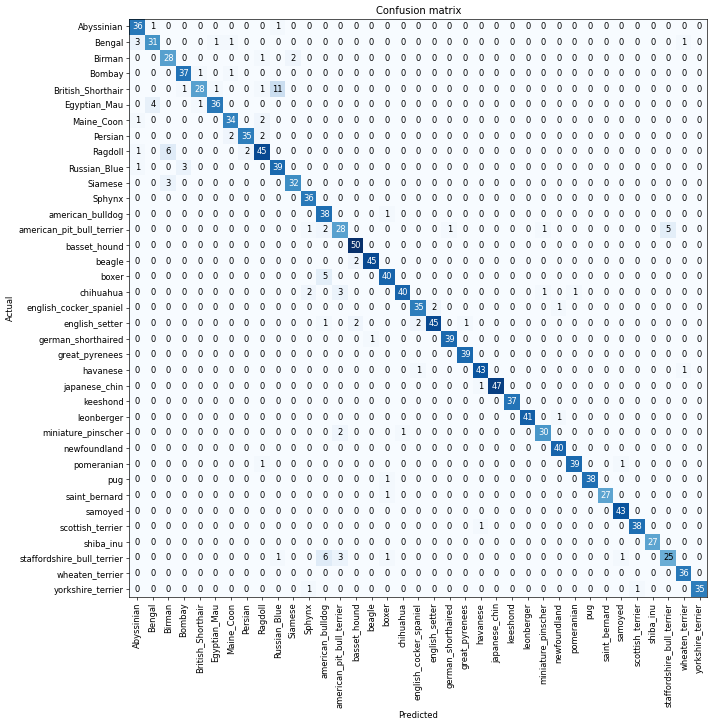

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=3)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


[('British_Shorthair', 'Russian_Blue', np.int64(11)),
 ('Ragdoll', 'Birman', np.int64(6)),
 ('staffordshire_bull_terrier', 'american_bulldog', np.int64(6)),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', np.int64(5)),
 ('boxer', 'american_bulldog', np.int64(5)),
 ('Egyptian_Mau', 'Bengal', np.int64(4)),
 ('Bengal', 'Abyssinian', np.int64(3)),
 ('Russian_Blue', 'Bombay', np.int64(3)),
 ('Siamese', 'Birman', np.int64(3)),
 ('chihuahua', 'american_pit_bull_terrier', np.int64(3)),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', np.int64(3))]

In [ ]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [ ]:
learn.load('stage_1', weights_only=False);

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,1.141717,2.402442,0.530447,00:58
1,1.080773,1.159236,0.347767,00:58
2,0.599667,0.542199,0.159675,00:59
3,0.317393,0.431873,0.138024,00:57


In [ ]:
learn.load('stage_1',weights_only=False);

SuggestedLRs(valley=4.365158383734524e-05)

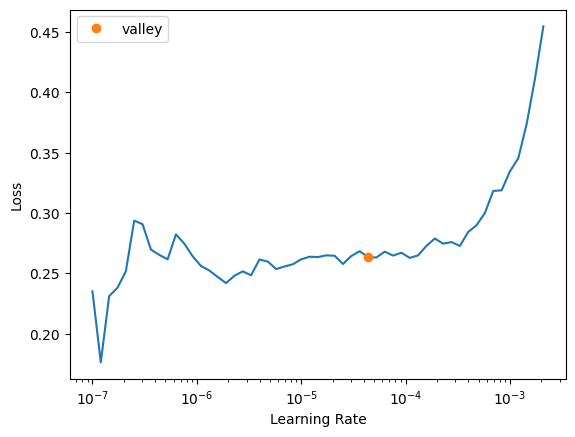

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.232298,0.242693,0.076455,01:00
1,0.218492,0.227622,0.071719,00:59
2,0.191118,0.225902,0.071042,00:58
3,0.186781,0.220781,0.072395,00:59


In [ ]:
learn.save('stage_2')

Path('models/stage_2.pth')

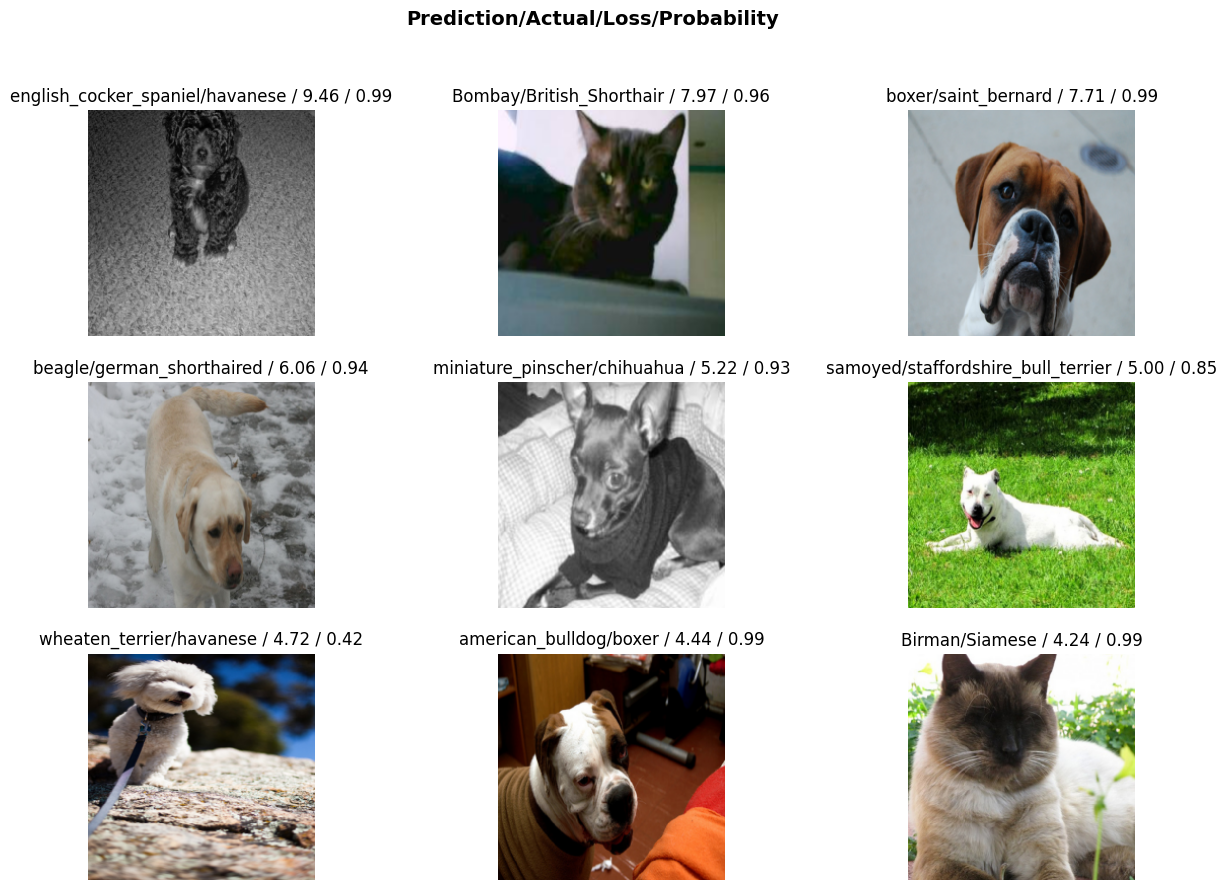

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

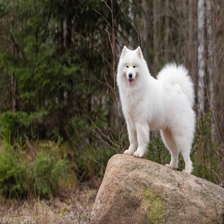

In [ ]:
img = PILImage.create('/content/images.jpeg')  # Replace with your image path
img = img.resize((224, 224))  # Resize to match model input size
display(img)


probs_percentage = (probs * 100).tolist()
img = img.to_bytes_format()  # Convert to bytes format if needed
pred_class, pred_idx, probs = learn.predict(img)
print(f"Predicted class: {pred_class}")
print(f"Predicted index: {pred_idx}")
print(f"Probabilities: {probs_percentage}")


In [ ]:
print(URLs.PETS)

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishvns/dogclassification")

print("Path to dataset files:", path)

100%|██████████| 976M/976M [00:37<00:00, 27.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashishvns/dogclassification/versions/1


In [ ]:
from fastai.vision.all import *

# ... (assuming 'learn' contains your loaded model)

# 1. Prepare the new dataset (directory structure, labels, etc.)

# 2. Create a new DataBlock
corgi_data = DataBlock(blocks=(ImageBlock, CategoryBlock), # Adjust blocks if needed
                     get_items=get_image_files,
                     get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),# Adjust get_y if needed
                     splitter=RandomSplitter(),
                     item_tfms=Resize(224),
                     batch_tfms=aug_transforms())

# 3. Create new DataLoaders
corgi_dls = corgi_data.dataloaders("/root/.cache/kagglehub/datasets/ashishvns/dogclassification/versions/1/image_classification2/image_classification2/train", bs=bs)


In [ ]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

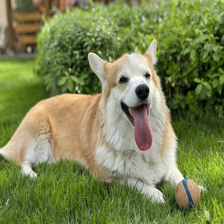

In [ ]:
img = PILImage.create('/content/Buri.jpg')  # Replace with your image path
img = img.resize((224, 224))  # Resize to match model input size
display(img)

In [ ]:
img = img.to_bytes_format()  # Convert to bytes format if needed
pred_class, pred_idx, probs = learn.predict(img)
print(f"Predicted class: {pred_class}")
print(f"Probabilities: {probs}")

Predicted class: shiba_inu
Probabilities: tensor([8.2675e-06, 2.4911e-07, 9.6676e-08, 1.9191e-07, 1.5351e-07, 3.5197e-09,
        4.3682e-08, 5.5049e-09, 1.0542e-06, 2.3866e-08, 5.8417e-07, 4.0353e-09,
        6.2693e-08, 6.1490e-07, 1.7803e-07, 1.0138e-06, 3.7436e-08, 4.6733e-07,
        1.4847e-08, 8.0566e-09, 5.3984e-09, 2.8651e-07, 1.3758e-08, 3.3264e-08,
        5.2544e-07, 2.2824e-06, 2.5264e-06, 1.0385e-08, 2.1030e-05, 6.7270e-07,
        1.1226e-07, 8.4306e-06, 1.8370e-08, 9.9995e-01, 8.6292e-07, 4.4965e-07,
        1.0191e-07])


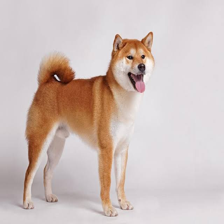

Predicted class: shiba_inu
Probabilities: [0.0009951728861778975, 0.00013422247138805687, 6.165439845062792e-05, 7.02698525856249e-05, 1.880582385638263e-05, 2.9697073387069395e-06, 1.8280708900419995e-05, 2.7304845389153343e-06, 0.00020697625586763024, 3.88080115953926e-06, 0.0001314978871960193, 1.8656689917406766e-06, 2.0533489077934064e-05, 0.0006036029080860317, 3.5739496524911374e-05, 0.00021501118317246437, 7.916365575511009e-06, 0.00020317126472946256, 4.915383215120528e-06, 3.506011580611812e-06, 1.5618724091837066e-06, 0.00016622889961581677, 5.526514087250689e-06, 1.1196619198017288e-05, 0.00029302568873390555, 0.0012385128065943718, 0.0015840820269659162, 4.644710770662641e-06, 0.009953215718269348, 0.0002950356574729085, 3.92521578760352e-05, 0.001682956237345934, 1.605408760951832e-05, 99.98139953613281, 0.0002434017660561949, 0.00027770226006396115, 4.045862442580983e-05]


In [ ]:
import torch

# ... (your existing code) ...

img = PILImage.create('/content/Shiba Inu.jpeg')
img = img.resize((224, 224))
display(img)

img = img.to_bytes_format()
pred_class, pred_idx, probs = learn.predict(img)

# Convert probabilities to percentages
probs_percentage = (probs * 100).tolist()

print(f"Predicted class: {pred_class}")
print(f"Probabilities: {probs_percentage}")

In [ ]:
print(pred_class)

shiba_inu


In [ ]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

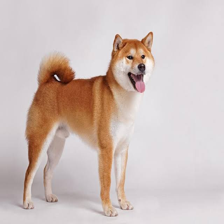

In [ ]:
img = PILImage.create('/content/Shiba Inu.jpeg')  # Replace with your image path
img = img.resize((224, 224))  # Resize to match model input size
display(img)

In [ ]:
img = img.to_bytes_format()  # Convert to bytes format if needed
pred_class, pred_idx, probs = learn.predict(img)
print(f"Predicted class: {pred_class}")
print(f"Probabilities: {probs}")

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Predicted class: shiba_inu
Probabilities: tensor([9.9517e-06, 1.3422e-06, 6.1654e-07, 7.0270e-07, 1.8806e-07, 2.9697e-08,
        1.8281e-07, 2.7305e-08, 2.0698e-06, 3.8808e-08, 1.3150e-06, 1.8657e-08,
        2.0533e-07, 6.0360e-06, 3.5739e-07, 2.1501e-06, 7.9164e-08, 2.0317e-06,
        4.9154e-08, 3.5060e-08, 1.5619e-08, 1.6623e-06, 5.5265e-08, 1.1197e-07,
        2.9303e-06, 1.2385e-05, 1.5841e-05, 4.6447e-08, 9.9532e-05, 2.9504e-06,
        3.9252e-07, 1.6830e-05, 1.6054e-07, 9.9981e-01, 2.4340e-06, 2.7770e-06,
        4.0459e-07])


<Axes: title={'center': 'shiba_inu'}>

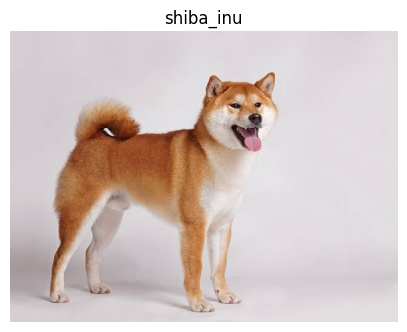

In [ ]:
# Replace img.show(title=f"{pred_class}") with:
img = PILImage.create('/content/Shiba Inu.jpeg')  # Recreate the PILImage from the original path
img.show(title=f"{pred_class}")